In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("zomato.csv", encoding = "ISO-8859-1")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

- Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [3]:
import matplotlib.pyplot as plt

df_india = df[df["Country Code"] == 1]
cities = ["Delhi NCR", "Rest Of India"]
rest_count = [0, 0]

total_restaurants = df_india.shape[0]
# We split the India dataset into two parts, Delhi NCR and the Rest
df_delhi_ncr = df_india.loc[(df_india['City'] == "New Delhi") | (df_india['City'] == 'Gurgaon') | (df_india['City'] == 'Noida') | (df_india['City'] == 'Ghaziabad') | (df_india['City'] == 'Faridabad')]
df_rest      = df_india.loc[(df_india['City'] != "New Delhi") & (df_india['City'] != 'Gurgaon') & (df_india['City'] != 'Noida') & (df_india['City'] != 'Ghaziabad') & (df_india['City'] != 'Faridabad')]

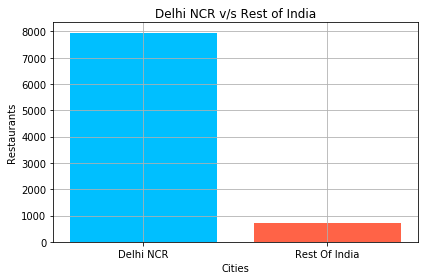

Delhi NCR 7947 
Rest of India 705


In [4]:
import matplotlib.pyplot as plt
plt.bar(cities, [df_delhi_ncr.shape[0], df_rest.shape[0]], color= ['deepskyblue', 'tomato'])
plt.title("Delhi NCR v/s Rest of India")
plt.xlabel("Cities")
plt.grid()
plt.ylabel("Restaurants")
plt.tight_layout()
plt.savefig('1.png', format='png', dpi = 300)
plt.show()
print('Delhi NCR', df_delhi_ncr.shape[0], '\nRest of India',df_rest.shape[0])

- Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [5]:
delhi_cuisines = set()
rest_cuisines = set()
def getCuisines(cuisine, s):
    for c in cuisine.strip().split(','):
        s.add(c.strip())
df_delhi_ncr['Cuisines'].apply(getCuisines, s = delhi_cuisines)
df_rest['Cuisines'].apply(getCuisines, s = rest_cuisines)
delhi_cuisines,rest_cuisines

({'Afghani',
  'African',
  'American',
  'Andhra',
  'Arabian',
  'Armenian',
  'Asian',
  'Assamese',
  'Awadhi',
  'Bakery',
  'Belgian',
  'Bengali',
  'Beverages',
  'Bihari',
  'Biryani',
  'British',
  'Burger',
  'Burmese',
  'Cafe',
  'Charcoal Grill',
  'Chettinad',
  'Chinese',
  'Continental',
  'Cuisine Varies',
  'Deli',
  'Desserts',
  'Drinks Only',
  'European',
  'Fast Food',
  'Finger Food',
  'French',
  'Goan',
  'Greek',
  'Gujarati',
  'Healthy Food',
  'Hyderabadi',
  'Ice Cream',
  'Indian',
  'Indonesian',
  'Iranian',
  'Italian',
  'Japanese',
  'Juices',
  'Kashmiri',
  'Kerala',
  'Korean',
  'Lebanese',
  'Lucknowi',
  'Maharashtrian',
  'Malaysian',
  'Mangalorean',
  'Mediterranean',
  'Mexican',
  'Middle Eastern',
  'Mithai',
  'Modern Indian',
  'Moroccan',
  'Mughlai',
  'Naga',
  'Nepalese',
  'North Eastern',
  'North Indian',
  'Oriya',
  'Pakistani',
  'Parsi',
  'Persian',
  'Pizza',
  'Portuguese',
  'Rajasthani',
  'Raw Meats',
  'Salad',
  '

In [6]:
# All the cuisines present in rest_cuisines and not in delhi_cuisines
# It can be given by rest_cuisines - (rest_cuisines ∩ delhi_cuisines)
cuisine_diff = rest_cuisines.difference(rest_cuisines.intersection(delhi_cuisines))
cuisine_diff

{'BBQ', 'Cajun', 'German', 'Malwani'}

In [7]:
# Lets check if these cuisines are absent in Delhi-NCR or we have an incomplete dataset
# API Key - 2dd776197f33176ef3452f5ded8f3797

import requests
h = {'user-key' : '2dd776197f33176ef3452f5ded8f3797'}
p = {'city_id' : 1}
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines', headers = h, params = p)
cus = res.json()
del_cus_api = [c['cuisine']['cuisine_name'] for c in cus['cuisines']]
print('\tPresent in Delhi-NCR(API)')
for el in cuisine_diff:
    print(el,end='')
    if el in del_cus_api:
        print('\tYes')
    else:
        print('\tNo')

	Present in Delhi-NCR(API)
Cajun	No
Malwani	Yes
BBQ	Yes
German	No


Hence we can say that German and Cajun cuisines are not present in Delhi, But Malwani and BBQ are present, and the dataset is incomplete

- Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [8]:
top_cuisines_delhi_ncr = {}
top_cuisines_rest = {}

def getTopCuisines(cuisine, d):
    for c in cuisine.strip().split(','):
        cus = c.strip()
        d[cus] = d.get(cus,0) + 1
        
df_delhi_ncr['Cuisines'].apply(getTopCuisines, d = top_cuisines_delhi_ncr)
df_rest['Cuisines'].apply(getTopCuisines, d = top_cuisines_rest)

from heapq import nlargest

top_ten_delhi_cuisines = nlargest(10, top_cuisines_delhi_ncr, key = top_cuisines_delhi_ncr.get) 
top_ten_rest_cuisines  = nlargest(10, top_cuisines_rest     , key = top_cuisines_rest.get)

top_ten_delhi_cuisines,top_ten_rest_cuisines

(['North Indian',
  'Chinese',
  'Fast Food',
  'Mughlai',
  'Bakery',
  'South Indian',
  'Continental',
  'Desserts',
  'Street Food',
  'Italian'],
 ['North Indian',
  'Chinese',
  'Continental',
  'Italian',
  'Cafe',
  'Fast Food',
  'South Indian',
  'Mughlai',
  'Desserts',
  'Mexican'])

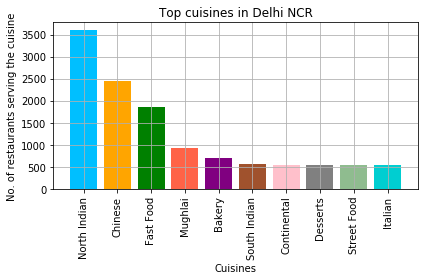

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


In [9]:
import matplotlib.pyplot as plt
plt.title('Top cuisines in Delhi NCR')
y = [top_cuisines_delhi_ncr[x] for x in top_ten_delhi_cuisines]
plt.bar(top_ten_delhi_cuisines, y, color= ['deepskyblue', 'orange', 'green', 'tomato', 'purple', 'sienna', 'pink', 'grey', 'darkseagreen', 'darkturquoise'])
plt.xticks(rotation = 90)
plt.grid()
plt.ylabel('No. of restaurants serving the cuisine')
plt.xlabel('Cuisines')
plt.tight_layout()
plt.savefig('2.png', format='png', dpi = 300)
plt.show()
for i in range(10): 
    print(top_ten_delhi_cuisines[i], y[i])    

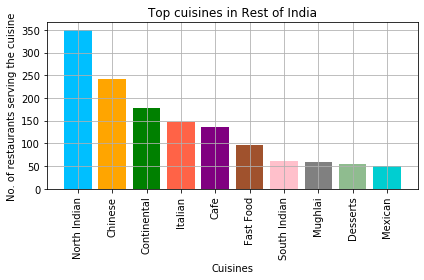

North Indian 349
Chinese 242
Fast Food 177
Mughlai 147
Bakery 136
South Indian 97
Continental 62
Desserts 59
Street Food 55
Italian 50


In [10]:
import matplotlib.pyplot as plt
plt.title('Top cuisines in Rest of India')
y = [top_cuisines_rest[x] for x in top_ten_rest_cuisines]
plt.bar(top_ten_rest_cuisines, y, color= ['deepskyblue', 'orange', 'green', 'tomato', 'purple', 'sienna', 'pink', 'grey', 'darkseagreen', 'darkturquoise'])
plt.xticks(rotation = 90)
plt.grid()
plt.ylabel("No. of restaurants serving the cuisine")
plt.xlabel('Cuisines')
plt.tight_layout()
plt.savefig('3.png', format='png', dpi = 300)
plt.show()
for i in range(10): 
    print(top_ten_delhi_cuisines[i], y[i])    

## User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

### Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

1. Number of Votes given Restaurant


In [11]:
plt.rcParams["figure.figsize"] = [20, 5]
# Used to increase the size of the plotted graph

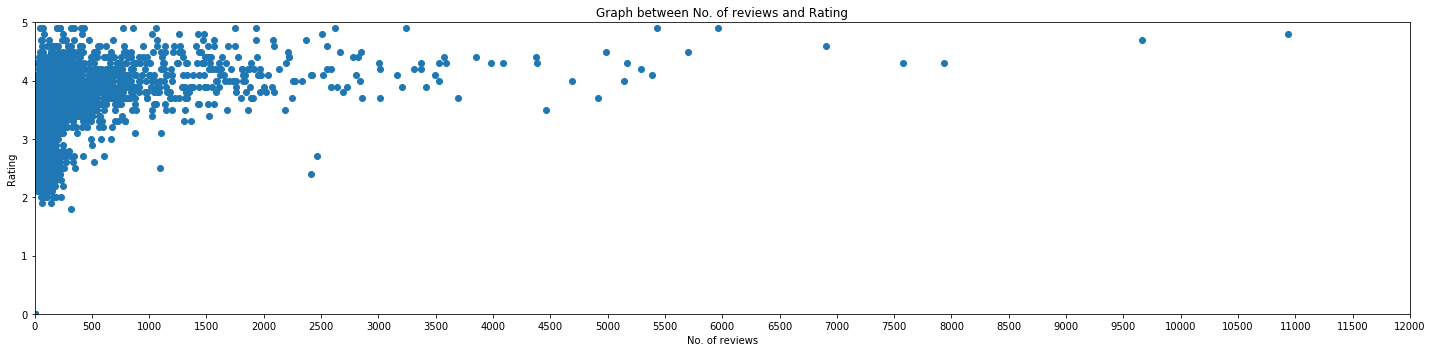

In [12]:
plt.scatter(df_india['Votes'], df_india['Aggregate rating'])
plt.ylim(0,5)
plt.xlim(0,12000)
plt.xticks(np.arange(0, 12001, 500))
plt.title('Graph between No. of reviews and Rating')
plt.xlabel('No. of reviews')
plt.ylabel("Rating")
plt.tight_layout()
plt.savefig('4.png', format='png', dpi = 300)
plt.show()

2. Restaurant serving more number of cuisines

In [13]:
plt.rcParams["figure.figsize"] = [5, 5]

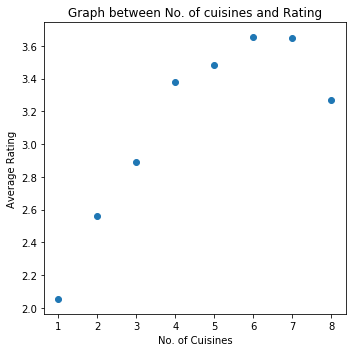

No. of cuisines - Average Rating
1		2.05509
2		2.56342
3		2.89054
4		3.37917
5		3.48129
6		3.65143
7		3.64615
8		3.26667


In [14]:
plt.rcParams["figure.figsize"] = [5, 5]
x = np.array([len(cuisine_string.strip().split(',')) for cuisine_string in df_india['Cuisines']])
y = df_india['Aggregate rating']
x = np.array(x)
# We have at maximum of 8 cuisines, Let us take the mean to calculate the average rating for all cuisines
new_y = [y[x == i].mean() for i in range(1,9)]
new_x = [i for i in range(1,9)]
new_x, new_y
plt.scatter(new_x, new_y)
plt.title('Graph between No. of cuisines and Rating')
plt.xlabel('No. of Cuisines')
plt.ylabel("Average Rating")
plt.tight_layout()
plt.savefig('5.png', format='png', dpi = 300)
plt.show()

print('No. of cuisines - Average Rating')
for i in range(8):
    print(i + 1, format(new_y[i], '.5f'), sep ='\t\t')

3. Average Cost of Restaurant

In [15]:
plt.rcParams["figure.figsize"] = [20, 5]

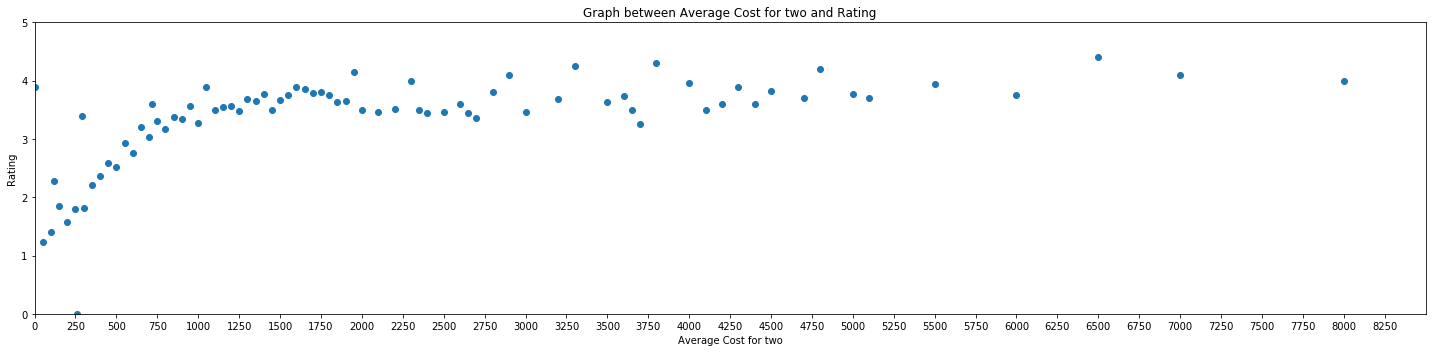

0	3.90000
50	1.22500
100	1.40909
120	2.27500
150	1.84972
200	1.58198
250	1.80409
260	0.00000
290	3.40000
300	1.81458
350	2.20643
400	2.37102
450	2.57909
500	2.52643
550	2.93846
600	2.76492
650	3.20904
700	3.03342
720	3.60000
750	3.30588
800	3.17442
850	3.37778
900	3.34907
950	3.56190
1000	3.28188
1050	3.90000
1100	3.50256
1150	3.55000
1200	3.55874
1250	3.48824
1300	3.67761
1350	3.65000
1400	3.77308
1450	3.50000
1500	3.66398
1550	3.75000
1600	3.88718
1650	3.85000
1700	3.79677
1750	3.80000
1800	3.76212
1850	3.63333
1900	3.65000
1950	4.15000
2000	3.49135
2100	3.46000
2200	3.52222
2300	4.00000
2350	3.50000
2400	3.44286
2500	3.46667
2600	3.60000
2650	3.45000
2700	3.36667
2800	3.80000
2900	4.10000
3000	3.45526
3200	3.68000
3300	4.25000
3500	3.64167
3600	3.73333
3650	3.50000
3700	3.25000
3800	4.30000
4000	3.96000
4100	3.50000
4200	3.60000
4300	3.90000
4400	3.60000
4500	3.81667
4700	3.70000
4800	4.20000
5000	3.77500
5100	3.70000
5500	3.95000
6000	3.75000
6500	4.40000
7000	4.10000
8000	4.00000


In [16]:
x = df_india['Average Cost for two']
y = df_india['Aggregate rating']

x_new = np.array(sorted(list(set(x))))
y_new = np.array([y[x == i].mean() for i in x_new])

# We will calculate the mean of all the restaurants serving at a
# specific price point, Let's say 10 restaurants have an average
# cost of Rs. 150, So we will consider the average rating of the 
# 10 restautrants for the cost '150'.

# x_new = All unique sorted costs, charged by any restaurant
# y_new = Average rating of all the restaurants for a particular cost

plt.scatter(x_new, y_new)
plt.ylim(0,5)
plt.xticks(np.arange(0, 8500, 250))
plt.xlim(0,8500)
plt.title('Graph between Average Cost for two and Rating')
plt.xlabel('Average Cost for two')
plt.ylabel("Rating")
plt.tight_layout()
plt.savefig('6.png', format='png', dpi = 300)
plt.show()
for i in range(x_new.shape[0]):
    print(x_new[i], format(y_new[i], '.5f'), sep = '\t')

4. Restaurant serving some specific cuisines

In [17]:
plt.rcParams["figure.figsize"] = [20, 5]

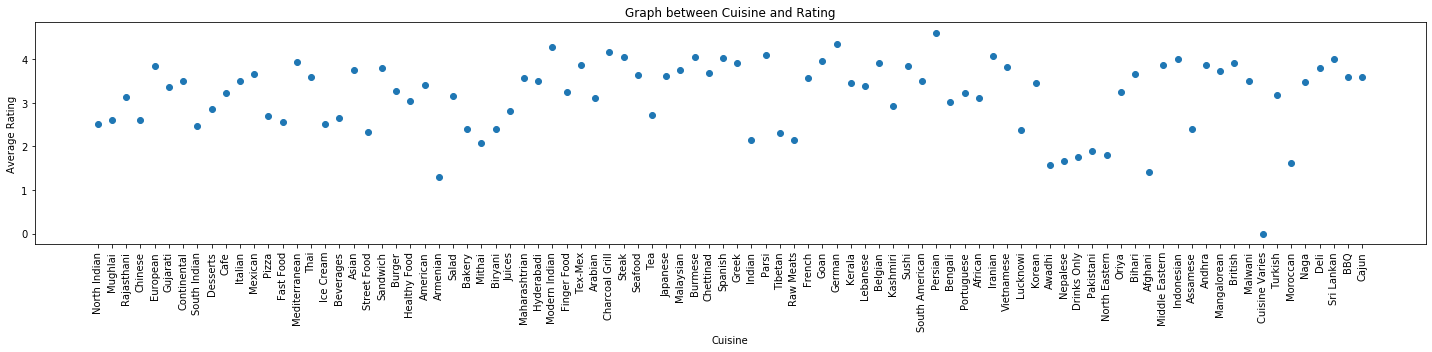

In [18]:
rating_on_cuisine = {}
# Let us fill a dictionary with every cuisine and all the ratings that it has 
def fill(a):
    for cuisine in a['Cuisines'].strip().split(','):
        cus = cuisine.strip()
        if cus in rating_on_cuisine:
            rating_on_cuisine[cus].append(a['Aggregate rating'])
        else:
            rating_on_cuisine[cus] = list()
            rating_on_cuisine[cus].append(a['Aggregate rating'])

df_india[['Cuisines', 'Aggregate rating']].apply(fill, axis=1)

x = []
y = []
for cuisine in rating_on_cuisine:
    x.append(cuisine)
    y.append(np.array(rating_on_cuisine[cuisine]).mean())

x = np.array(x)
y = np.array(y)
plt.scatter(x, y)
plt.xticks(rotation = 90)
plt.title('Graph between Cuisine and Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.tight_layout()

plt.savefig('7.png', format='png', dpi = 300)

### Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes)

In [19]:
aggregate_rating = {}
localities = df_india['Locality'].value_counts().index
for locality in localities:
    df_locality = df_india.loc[df_india['Locality'] == locality]
    rating = np.array(df_locality['Aggregate rating'])
    votes = np.array(df_locality['Votes'])
    numerator = (rating * votes).sum()
    denominator = votes.sum()
    aggregate_rating[locality] =  numerator/denominator

aggregate_rating

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


{'Connaught Place': 3.850587390425341,
 'Rajouri Garden': 3.9502685660906125,
 'Shahdara': 2.6769805680119583,
 'Defence Colony': 3.751019361456597,
 'Pitampura': 3.2555198814522104,
 'Malviya Nagar': 3.5178643489057895,
 'Mayur Vihar Phase 1': 3.051849894291755,
 'Rajinder Nagar': 3.3049313479017597,
 'Safdarjung': 3.860269322168157,
 'Satyaniketan': 3.9887471138655974,
 'Krishna Nagar': 3.088365650969529,
 'Karol Bagh': 3.4658316221765912,
 'Sector 62': 3.203087143415397,
 'Sector 18': 3.5406518397974867,
 'Hauz Khas': 3.614607149337688,
 'Kalkaji': 3.425328947368421,
 'Sector 15': 3.695495758993858,
 'DLF Phase 3': 3.429210058420117,
 'Mahipalpur': 2.710726643598616,
 'Mukherjee Nagar': 2.7037037037037037,
 'Shalimar Bagh': 3.436336866902238,
 'Chandni Chowk': 3.8225,
 'Greater Kailash (GK) 1': 3.8415381704663703,
 'Greater Kailash (GK) 2': 3.746149417014539,
 'Kamla Nagar': 3.581042128603104,
 'Delhi University-GTB Nagar': 3.9519086711133915,
 'Paharganj': 3.6443824145150034,
 'MG 

In [20]:
print('Top 10 localities are as follows :')
import heapq
top_aggregate = heapq.nlargest(10, aggregate_rating, key=aggregate_rating.get)
print('Locality\tRating')
for el in top_aggregate:
    print(el, format(aggregate_rating[el], '.2f'), sep='\t')

Top 10 localities are as follows :
Locality	Rating
Hotel Clarks Amer, Malviya Nagar	4.90
Aminabad	4.90
Friends Colony	4.89
Powai	4.84
Kirlampudi Layout	4.82
Deccan Gymkhana	4.80
Express Avenue Mall,  Royapettah	4.80
Banjara Hills	4.72
Sector 5, Salt Lake	4.71
Riverside Mall, Gomti Nagar	4.70


### Visualization

Plot the bar graph top 15 restaurants have a maximum number of outlets

In [21]:
plt.rcParams["figure.figsize"] = [10, 5]

Cafe Coffee Day 83
Domino's Pizza 79
Subway 63
Green Chick Chop 51
Giani 51
Pizza Hut 48
McDonald's 48
Keventers 34
Baskin Robbins 28
Barbeque Nation 25
Dunkin' Donuts 22
Barista 22
Costa Coffee 20
Pind Balluchi 20
Sagar Ratna 19


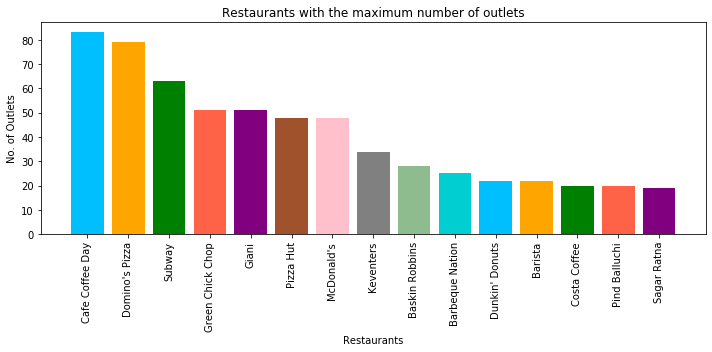

In [22]:
df_top_res = df_india
# Correcting the names of same res
df_top_res = df_top_res.replace({"Giani's" : "Giani"})
df_top_res = df_top_res.replace({"Pizza Hut Delivery" : "Pizza Hut"}) 
top_15_res = df_top_res['Restaurant Name'].value_counts().index[:15]
top_15_res_outlets = df_top_res['Restaurant Name'].value_counts().values[:15]

for i in range(15):
    print(top_15_res[i], top_15_res_outlets[i])
plt.bar(top_15_res, top_15_res_outlets, color= ['deepskyblue', 'orange', 'green', 'tomato', 'purple', 'sienna', 'pink', 'grey', 'darkseagreen', 'darkturquoise'])

plt.xticks(rotation = 90)
plt.title('Restaurants with the maximum number of outlets')
plt.xlabel('Restaurants')
plt.ylabel('No. of Outlets')
plt.tight_layout()

plt.savefig('8.png', format='png', dpi = 300)

Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

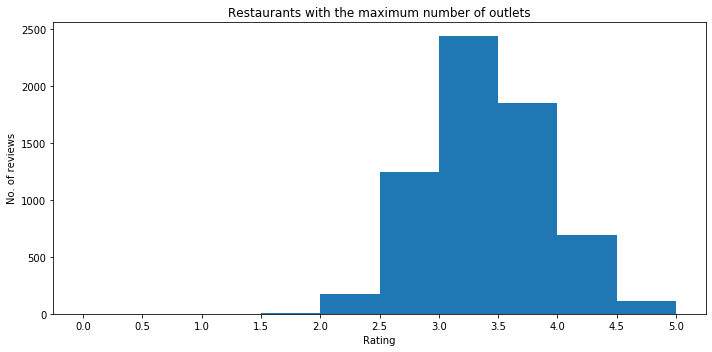

In [27]:
df_hist = df_india

# Dropping the Unrated restaurants
df_hist.drop(df_hist.loc[df_hist['Aggregate rating'] == 0.0].index , inplace=True)

# Plotting the histogram
aggregate_rating_hist = df_hist['Aggregate rating'].values
plt.hist(aggregate_rating_hist, bins = np.arange(0,5.1,0.5))

plt.title('Restaurants with the maximum number of outlets')
plt.xlabel('Rating')
plt.xticks(np.arange(0,5.1,0.5))
plt.ylabel('No. of reviews')
plt.tight_layout()

plt.savefig('9.png', format='png', dpi = 300)

Plot the bar graph top 10 restaurants in the data with the highest number of votes.

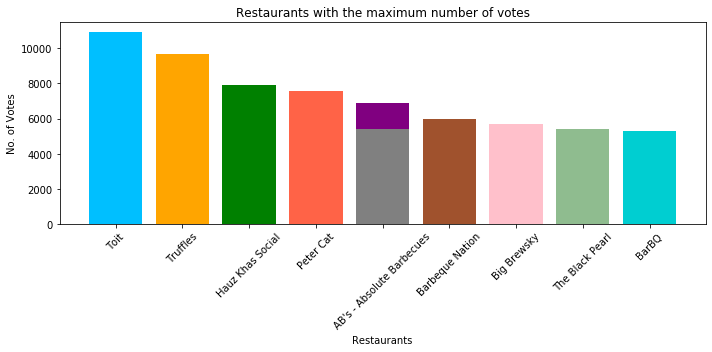

In [24]:
df_top_votes = df_india.sort_values('Votes',ascending = False).head(10)
rest_name  = df_top_votes['Restaurant Name'].values
rest_votes = df_top_votes['Votes'].values
plt.bar(rest_name,rest_votes, color= ['deepskyblue', 'orange', 'green', 'tomato', 'purple' ,'sienna', 'pink', 'grey', 'darkseagreen', 'darkturquoise'])
plt.xticks(rotation = 45)
plt.title('Restaurants with the maximum number of votes')
plt.xlabel('Restaurants')
plt.ylabel('No. of Votes')
plt.tight_layout()

plt.savefig('9.png', format='png', dpi = 300)
plt.show()

Plot the pie graph of top 10 cuisines present in restaurants in the USA.

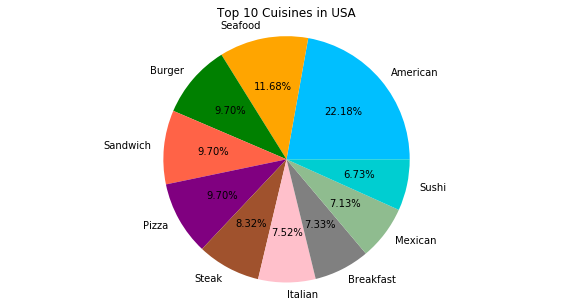

In [25]:
df_usa = df.loc[df['Country Code'] == 216]
usa_cuisines = {}

def fill_cuisines(cuisine):
    if not pd.isnull(cuisine):
        for cus in cuisine.strip().split(','):
            cus = cus.strip()
            usa_cuisines[cus] = usa_cuisines.get(cus, 0) + 1

df_usa['Cuisines'].apply(fill_cuisines)

top_usa_cuisine = nlargest(10, usa_cuisines, key = usa_cuisines.get) 
top_usa_cuisine

plt.pie([usa_cuisines[cus] for cus in top_usa_cuisine], labels = top_usa_cuisine, colors = ['deepskyblue', 'orange', 'green', 'tomato', 'purple' ,'sienna', 'pink', 'grey', 'darkseagreen', 'darkturquoise'], autopct = '%.2f%%')
plt.axis('equal')
plt.title('Top 10 Cuisines in USA')
plt.savefig('10.png', format='png', dpi = 300)

Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

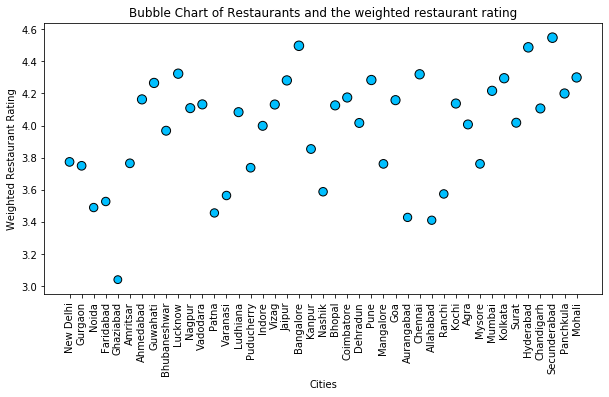

In [26]:
aggregate_rating_city = {}
cities = df_india['City'].value_counts().index
for city in cities:
    df_city = df_india.loc[df_india['City'] == city]
    rating = np.array(df_city['Aggregate rating'])
    votes = np.array(df_city['Votes'])
    numerator = (rating * votes).sum()
    denominator = votes.sum()
    aggregate_rating_city[city] =  numerator/denominator

plt.scatter(cities, [aggregate_rating_city[c] for c in cities], s = [aggregate_rating_city[c]*20 for c in cities],c = 'deepskyblue', edgecolor = 'black')
# The aggregate_rating_city is pretty close, so all the bubbles look quite similar
plt.xticks(rotation = 90)
plt.title('Bubble Chart of Restaurants and the weighted restaurant rating')
plt.savefig('11.png', format='png', dpi = 300)
plt.xlabel('Cities')
plt.ylabel('Weighted Restaurant Rating')
plt.show()